## Задание №6.
### Анализ графовой модели

In [ ]:
# устанавливаем необходимые библиотеки
!pip3 install networkx numpy pyvis matplotlib scipy pandas

##### Заново определим с помощью средств языка программирования граф <em><b>G1</em></b> и отририсуем его

In [89]:
# определяем граф через перечисление Узлов, Ребер и Весов
import numpy as np
import networkx as nx


nodes = [
    "Liner2",    # 0
    "Liner1",    # 1
    "MTS1",      # 2
    "MTS2",      # 3
    "NTK1",      # 4
    "NTK2",      # 5
    "nsk-gw1",   # 6
    "nsk-gw2",   # 7
    "spb-gw1",   # 8
    "spb-gw2",   # 9
    "ams-gw1",   # 10
    "ams-gw2",   # 11
    "ams-gw3"    # 12
]

edges = [
    # Ветка Liner
    (0, 1, 1),    # Liner2 (0) -> Liner1 (1) [Вес: 1]
    (1, 9, 2),    # Liner1 (1) -> spb-gw2 (9) [Вес: 2]

    # Ветка MTS
    (2, 3, 1),    # MTS1 (2) -> MTS2 (3) [Вес: 1]
    (2, 8, 1),    # MTS1 (2) -> spb-gw1 (8) [Вес: 1]

    # Ветка NTK
    (4, 6, 1),    # NTK1 (4) -> nsk-gw1 (6) [Вес: 1]
    (5, 7, 1),    # NTK2 (5) -> nsk-gw2 (7) [Вес: 1]

    # Связи NSK -> SPB
    (6, 9, 52),   # nsk-gw1 (6) -> spb-gw2 (9) [Вес: 52]
    (6, 8, 61),   # nsk-gw1 (6) -> spb-gw1 (8) [Вес: 61]
    (7, 9, 42),   # nsk-gw2 (7) -> spb-gw2 (9) [Вес: 42]
    (7, 8, 57),   # nsk-gw2 (7) -> spb-gw1 (8) [Вес: 57]

    # Связи внутри SPB
    (8, 9, 26),   # spb-gw1 (8) <-> spb-gw2 (9) [Вес: 26]

    # Связи SPB -> AMS
    (9, 10, 40),  # spb-gw2 (9) -> ams-gw1 (10) [Вес: 40]
    (9, 12, 58),  # spb-gw2 (9) -> ams-gw3 (12) [Вес: 58]
    (9, 11, 35),  # spb-gw2 (9) -> ams-gw2 (11) [Вес: 35]

    (8, 10, 35),  # spb-gw1 (8) -> ams-gw1 (10) [Вес: 35]
    (8, 11, 36),  # spb-gw1 (8) -> ams-gw2 (11) [Вес: 36]
    (8, 12, 36),  # spb-gw1 (8) -> ams-gw3 (12) [Вес: 36]

    # Связи внутри AMS (треугольник)
    (10, 11, 35), # ams-gw1 (10) <-> ams-gw2 (11) [Вес: 35]
    (10, 12, 11), # ams-gw1 (10) <-> ams-gw3 (12) [Вес: 11]
    (11, 12, 8)   # ams-gw2 (11) <-> ams-gw3 (12) [Вес: 8]
]

n = len(nodes)
adj_matrix = np.zeros((n, n), dtype=int)

for u, v, w in edges:
    adj_matrix[u, v] = w
    adj_matrix[v, u] = w

G1 = nx.from_numpy_array(adj_matrix)

mapping = {i: name for i, name in enumerate(nodes)}
G1 = nx.relabel_nodes(G1, mapping)


In [90]:
print(nodes)

['Liner2', 'Liner1', 'MTS1', 'MTS2', 'NTK1', 'NTK2', 'nsk-gw1', 'nsk-gw2', 'spb-gw1', 'spb-gw2', 'ams-gw1', 'ams-gw2', 'ams-gw3']


In [91]:
# проверяем что получилось в объекте графа
from pprint import pprint
pprint(list(G1.edges(data=True)))

[('Liner2', 'Liner1', {'weight': 1}),
 ('Liner1', 'spb-gw2', {'weight': 2}),
 ('MTS1', 'MTS2', {'weight': 1}),
 ('MTS1', 'spb-gw1', {'weight': 1}),
 ('NTK1', 'nsk-gw1', {'weight': 1}),
 ('NTK2', 'nsk-gw2', {'weight': 1}),
 ('nsk-gw1', 'spb-gw1', {'weight': 61}),
 ('nsk-gw1', 'spb-gw2', {'weight': 52}),
 ('nsk-gw2', 'spb-gw1', {'weight': 57}),
 ('nsk-gw2', 'spb-gw2', {'weight': 42}),
 ('spb-gw1', 'spb-gw2', {'weight': 26}),
 ('spb-gw1', 'ams-gw1', {'weight': 35}),
 ('spb-gw1', 'ams-gw2', {'weight': 36}),
 ('spb-gw1', 'ams-gw3', {'weight': 36}),
 ('spb-gw2', 'ams-gw1', {'weight': 40}),
 ('spb-gw2', 'ams-gw2', {'weight': 35}),
 ('spb-gw2', 'ams-gw3', {'weight': 58}),
 ('ams-gw1', 'ams-gw2', {'weight': 35}),
 ('ams-gw1', 'ams-gw3', {'weight': 11}),
 ('ams-gw2', 'ams-gw3', {'weight': 8})]


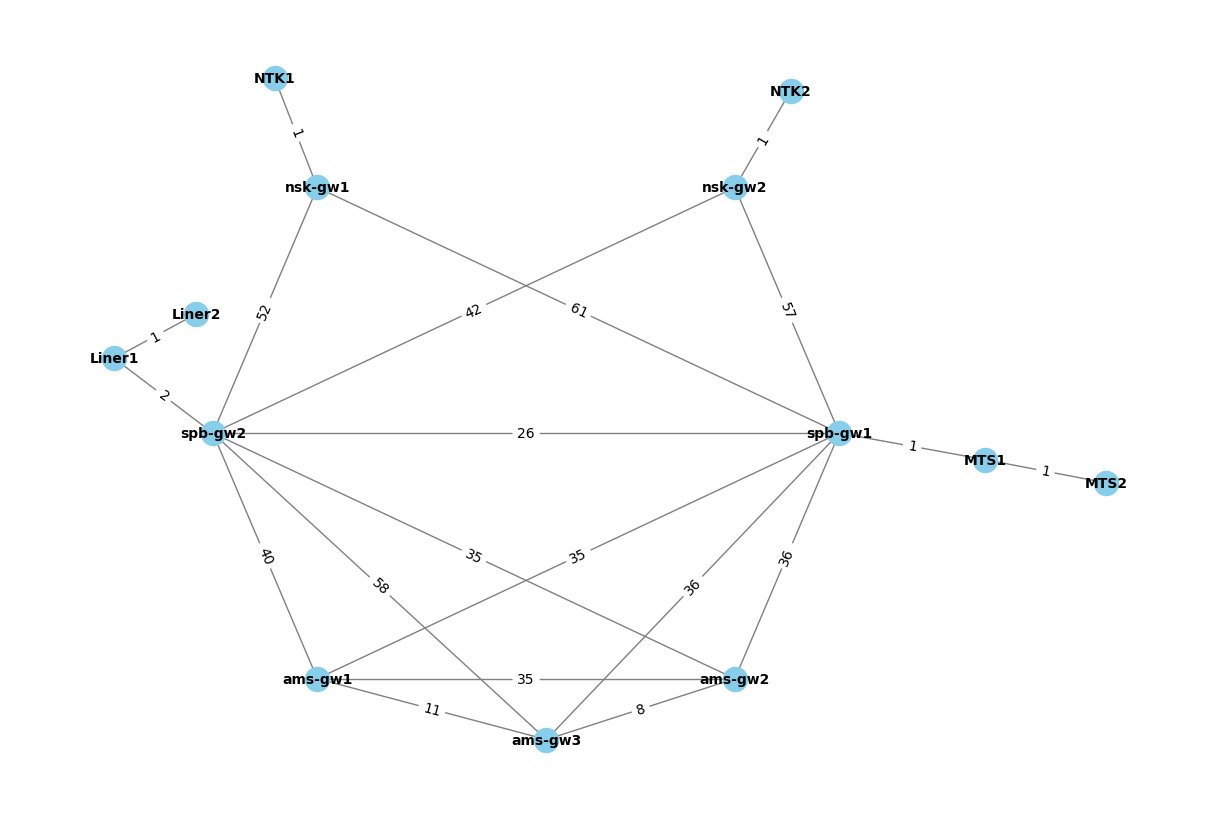

In [92]:
# отрисовываем сам граф и смотрим чтобы он в точности совпадал с оригинальным G1
import networkx as nx
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))

# В виду того, что алгоритм раскладки использует физику притяжения 
# (чем больше вес ребра - тем короче расстояние между узлами)
# используем f(x)=1/x + a , чтобы починить отображение

for u, v, data in G1.edges(data=True):
    real_weight = data["weight"]
    if real_weight > 0:
        data["spring_strength"] = 1 / real_weight * 5
    else:
        data["spring_strength"] = 0

# а это тот момент, где я замучался отлаживать алгоритм дальше и просто часть узлов "прибил гвоздями"        
fixed_positions = {
    "nsk-gw1": [-0.1, 1.0],
    "nsk-gw2": [0.7, 1.0],
    "spb-gw2": [-0.3, 0.5],
    "spb-gw1": [0.9, 0.5],
    "ams-gw1": [-0.1, 0],
    "ams-gw2": [0.7, 0],
}

pos = nx.spring_layout(G1, 
    weight="spring_strength",
    k=(1 / len(nodes) ** 0.5),
    seed=42,
    pos=fixed_positions,
    fixed=fixed_positions.keys()
) 

nx.draw(G1, pos, 
        with_labels=True, 
        node_color="skyblue", 
        node_size=300, 
        font_size=10, 
        font_weight="bold",
        edge_color="gray")

labels = nx.get_edge_attributes(G1, "weight")
nx.draw_networkx_edge_labels(G1, pos, edge_labels=labels)

plt.show()

####  6.а) Минимальное остовное дерево (MST):  

* Исследуйте два алгоритма построения минимального остовного дерева на своем графе. По шагам постройте минимальное остовное дерево (3 балла).  
* В результате приведите построенный граф (дерево выделите) и укажите сумму длин его ребер. Сделайте выводы об эффективности алгоритмов (2 балла).

In [93]:
# Отортируем все ребра по их весам 
import pandas as pd
all_edges = list(G1.edges(data=True))
sorted_edges = sorted(all_edges, key=lambda x: x[2]["weight"])

labels = ["Source Node", "Destinstion Node", "Weight"]
edge_list = []

for u, v, data in sorted_edges:
    edge_list.append([u, v, data["weight"]])
    
df_edges = pd.DataFrame(edge_list, columns=labels)
display(df_edges)

,Source Node,Destinstion Node,Weight
0,Liner2,Liner1,1
1,MTS1,MTS2,1
2,MTS1,spb-gw1,1
3,NTK1,nsk-gw1,1
4,NTK2,nsk-gw2,1
5,Liner1,spb-gw2,2
6,ams-gw2,ams-gw3,8
7,ams-gw1,ams-gw3,11
8,spb-gw1,spb-gw2,26
9,spb-gw1,ams-gw1,35


In [94]:
# нарисуем матрицу связности
def highlight_connections(val):
    color = "#808080" if val == 0 else "black"
    weight = "normal" if val == 0 else "bold"
    bg_color = "" if val == 0 else "#e6f7ff"
    return f"color: {color}; font-weight: {weight}; background-color: {bg_color}"

df_adj = nx.to_pandas_adjacency(G1, weight="weight", dtype=int)

styler = df_adj.style.map(highlight_connections)
styler.set_properties(**{
    "width": "60px",       # Фиксированная ширина
    "min-width": "60px",   # Запрет на сжатие
    "max-width": "60px",   # Запрет на расширение
    "height": "60px",      # Фиксированная высота
    "text-align": "center",# Текст по центру
    "border": "2px solid lightgray" # Сетка (границы ячеек)
})
styler = styler.set_table_styles([
    {"selector": "th", "props": [
        ("text-align", "center"), 
        ("vertical-align", "center"), # Текст заголовков прижат к низу
        ("width", "60px"),
        ("min-width", "60px"),
        ("max-width", "60px")
    ]},
    # {"selector": "th.col_heading", "props": [
    #     ("writing-mode", "vertical-rl"), 
    #     ("transform", "rotate(180deg)"), 
    #     ("height", "100px"),  # Высота шапки, чтобы влез текст
    #     ("vertical-align", "top")
    # ]}
])

display(styler)

,Liner2,Liner1,MTS1,MTS2,NTK1,NTK2,nsk-gw1,nsk-gw2,spb-gw1,spb-gw2,ams-gw1,ams-gw2,ams-gw3
Liner2,0,1,0,0,0,0,0,0,0,0,0,0,0
Liner1,1,0,0,0,0,0,0,0,0,2,0,0,0
MTS1,0,0,0,1,0,0,0,0,1,0,0,0,0
MTS2,0,0,1,0,0,0,0,0,0,0,0,0,0
NTK1,0,0,0,0,0,0,1,0,0,0,0,0,0
NTK2,0,0,0,0,0,0,0,1,0,0,0,0,0
nsk-gw1,0,0,0,0,1,0,0,0,61,52,0,0,0
nsk-gw2,0,0,0,0,0,1,0,0,57,42,0,0,0
spb-gw1,0,0,1,0,0,0,61,57,0,26,35,36,36
spb-gw2,0,2,0,0,0,0,52,42,26,0,40,35,58


Количество ребер в полном графе: 20


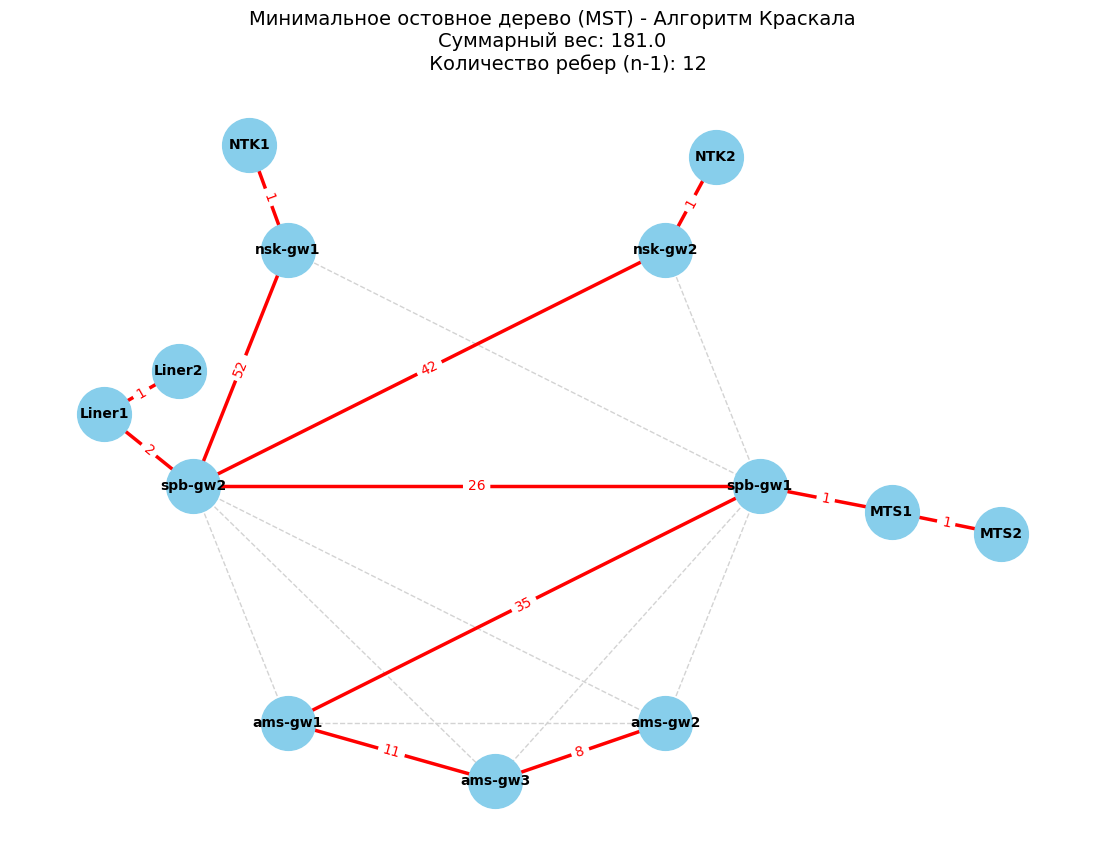

CPU times: user 65.3 ms, sys: 11.3 ms, total: 76.6 ms
Wall time: 75.3 ms


In [95]:
%%time
import networkx as nx
import matplotlib.pyplot as plt

# Вычисляем Минимальное Остовное Дерево (MST) по алгоритму Краскала
mst = nx.minimum_spanning_tree(G1, algorithm="kruskal")

# Считаем сумму длин ребер
total_weight = mst.size(weight="weight")

print(f"Количество ребер в полном графе: {G1.number_of_edges()}")
plt.figure(figsize=(14, 10))

mst_edges = list(mst.edges())
all_edges = list(G1.edges())
non_mst_edges = [e for e in all_edges if e not in mst_edges and (e[1], e[0]) not in mst_edges]
# pos = nx.spring_layout(G1, k=2.5, weight="spring_strength", pos=fixed_positions, fixed=fixed_positions.keys(), seed=42)

nx.draw_networkx_nodes(G1, pos, node_color="skyblue", node_size=1500)
nx.draw_networkx_labels(G1, pos, font_size=10, font_weight="bold")

# "лишние" ребра
nx.draw_networkx_edges(G1, pos, edgelist=non_mst_edges, 
                       edge_color="lightgray", style="dashed", width=1)
# ребра MST
nx.draw_networkx_edges(G1, pos, edgelist=mst_edges, edge_color="red", width=2.5)

# Подписи весов
edge_labels = nx.get_edge_attributes(G1, "weight")
# Фильтруем подписи, оставляя только те, что в MST
mst_edge_labels = {k: v for k, v in edge_labels.items() if k in mst_edges or (k[1], k[0]) in mst_edges}

nx.draw_networkx_edge_labels(G1, pos, edge_labels=mst_edge_labels, font_color="red")

plt.title(f"Минимальное остовное дерево (MST) - Алгоритм Краскала\nСуммарный вес: {total_weight}\n \
    Количество ребер (n-1): {mst.number_of_edges()}", fontsize=14)
plt.axis("off")
plt.show()

Количество ребер в полном графе: 20


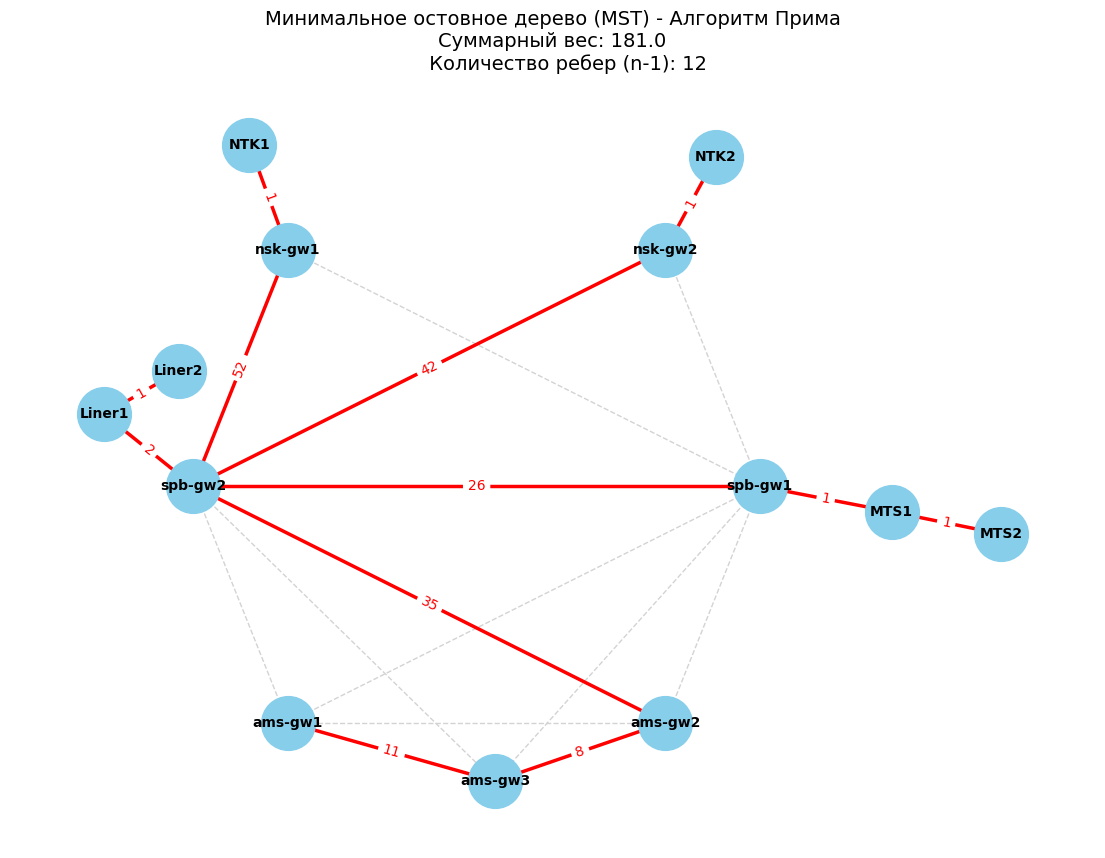

CPU times: user 74.7 ms, sys: 11.6 ms, total: 86.3 ms
Wall time: 84.9 ms


In [96]:
%%time
import networkx as nx
import matplotlib.pyplot as plt

# Вычисляем Минимальное Остовное Дерево (MST) по алгоритму Прима
mst = nx.minimum_spanning_tree(G1, algorithm="prim")

# Считаем сумму длин ребер
total_weight = mst.size(weight="weight")

print(f"Количество ребер в полном графе: {G1.number_of_edges()}")
plt.figure(figsize=(14, 10))

mst_edges = list(mst.edges())
all_edges = list(G1.edges())
non_mst_edges = [e for e in all_edges if e not in mst_edges and (e[1], e[0]) not in mst_edges]
# pos = nx.spring_layout(G1, k=2.5, weight="spring_strength", pos=fixed_positions, fixed=fixed_positions.keys(), seed=42)

nx.draw_networkx_nodes(G1, pos, node_color="skyblue", node_size=1500)
nx.draw_networkx_labels(G1, pos, font_size=10, font_weight="bold")

# "лишние" ребра
nx.draw_networkx_edges(G1, pos, edgelist=non_mst_edges, 
                       edge_color="lightgray", style="dashed", width=1)
# ребра MST
nx.draw_networkx_edges(G1, pos, edgelist=mst_edges, edge_color="red", width=2.5)

# Подписи весов
edge_labels = nx.get_edge_attributes(G1, "weight")
# Фильтруем подписи, оставляя только те, что в MST
mst_edge_labels = {k: v for k, v in edge_labels.items() if k in mst_edges or (k[1], k[0]) in mst_edges}

nx.draw_networkx_edge_labels(G1, pos, edge_labels=mst_edge_labels, font_color="red")

plt.title(f"Минимальное остовное дерево (MST) - Алгоритм Прима\nСуммарный вес: {total_weight}\n \
    Количество ребер (n-1): {mst.number_of_edges()}", fontsize=14)
plt.axis("off")
plt.show()

### 6.б) Кратчайший маршрут:  
* Укажите начальный узел. Исследуйте алгоритм Дейкстры построения кратчайшего маршрута на своем графе. По шагам найдите кратчайшие маршруты из начального узла во все остальные, составьте пошаговые таблицы, отражающие алгоритм решения задачи (3 балла).
* В результате приведите соответствующие маршруты и их протяженность (2 балла).

In [112]:
import pandas as pd
import networkx as nx

# начальный узел выберем за пределами полного подграфа G3
# смоделируем как пользователи из города NSK получают доступ к ресурсам AMS
start_node = "nsk-gw1"


# unvisited - множество непосещенных узлов
unvisited = list(G1.nodes())
# shortest_paths - словарь кратчайших расстояний (изначально бесконечность)
shortest_paths = {node: float("inf") for node in G1.nodes()}
shortest_paths[start_node] = 0
# previous_nodes - словарь для восстановления маршрута (кто был родителем)
previous_nodes = {node: None for node in G1.nodes()}


history = []
step_counter = 1
visited_nodes = set()

while unvisited:
    # Шаг А: Выбираем узел с минимальной известной дистанцией среди непосещенных
    current_min_node = None
    for node in unvisited:
        if current_min_node is None:
            current_min_node = node
        elif shortest_paths[node] < shortest_paths[current_min_node]:
            current_min_node = node
            
    # Если путь до ближайшего узла равен бесконечности, значит остались недостижимые острова
    if shortest_paths[current_min_node] == float("inf"):
        break
    
    # Шаг Б: Смотрим соседей текущего узла
    neighbors = G1.neighbors(current_min_node)
    for neighbor in neighbors:
        weight = G1[current_min_node][neighbor]["weight"]
        potential_path = shortest_paths[current_min_node] + weight
        
        # Релаксация: если нашли путь короче, чем знали раньше -> обновляем
        if potential_path < shortest_paths[neighbor]:
            shortest_paths[neighbor] = potential_path
            previous_nodes[neighbor] = current_min_node
    
    # Сохраняем состояние для таблицы ПЕРЕД удалением узла из unvisited
    # Формируем строку таблицы: Шаг | Текущий узел | Дистанции до всех узлов...
    row = {
        "Шаг": step_counter,
        "Выбранный узел": current_min_node,
        "Метка (вес)": shortest_paths[current_min_node]
    }
    # Добавляем текущие известные расстояния до всех остальных узлов
    for node in G1.nodes():
        val = shortest_paths[node]
        row[node] = val if val != float("inf") else "∞"
        
    history.append(row)

    # Шаг В: Помечаем узел как посещенный
    unvisited.remove(current_min_node)
    visited_nodes.add(current_min_node)
    step_counter += 1

print(f"Пошаговое выполнение алгоритма Дейкстры (Начало: {start_node})")
df_dijkstra = pd.DataFrame(history)
df_dijkstra.set_index("Шаг", inplace=True)
df_dijkstra.style.set_properties(**{"text-align": "center"}).format(precision=0)
display(df_dijkstra)

Пошаговое выполнение алгоритма Дейкстры (Начало: nsk-gw1)


,Выбранный узел,Метка (вес),Liner2,Liner1,MTS1,MTS2,NTK1,NTK2,nsk-gw1,nsk-gw2,spb-gw1,spb-gw2,ams-gw1,ams-gw2,ams-gw3
Шаг,,,,,,,,,,,,,,,
1,nsk-gw1,0,∞,∞,∞,∞,1,∞,0,∞,61,52,∞,∞,∞
2,NTK1,1,∞,∞,∞,∞,1,∞,0,∞,61,52,∞,∞,∞
3,spb-gw2,52,∞,54,∞,∞,1,∞,0,94,61,52,92,87,110
4,Liner1,54,55,54,∞,∞,1,∞,0,94,61,52,92,87,110
5,Liner2,55,55,54,∞,∞,1,∞,0,94,61,52,92,87,110
6,spb-gw1,61,55,54,62,∞,1,∞,0,94,61,52,92,87,97
7,MTS1,62,55,54,62,63,1,∞,0,94,61,52,92,87,97
8,MTS2,63,55,54,62,63,1,∞,0,94,61,52,92,87,97
9,ams-gw2,87,55,54,62,63,1,∞,0,94,61,52,92,87,95


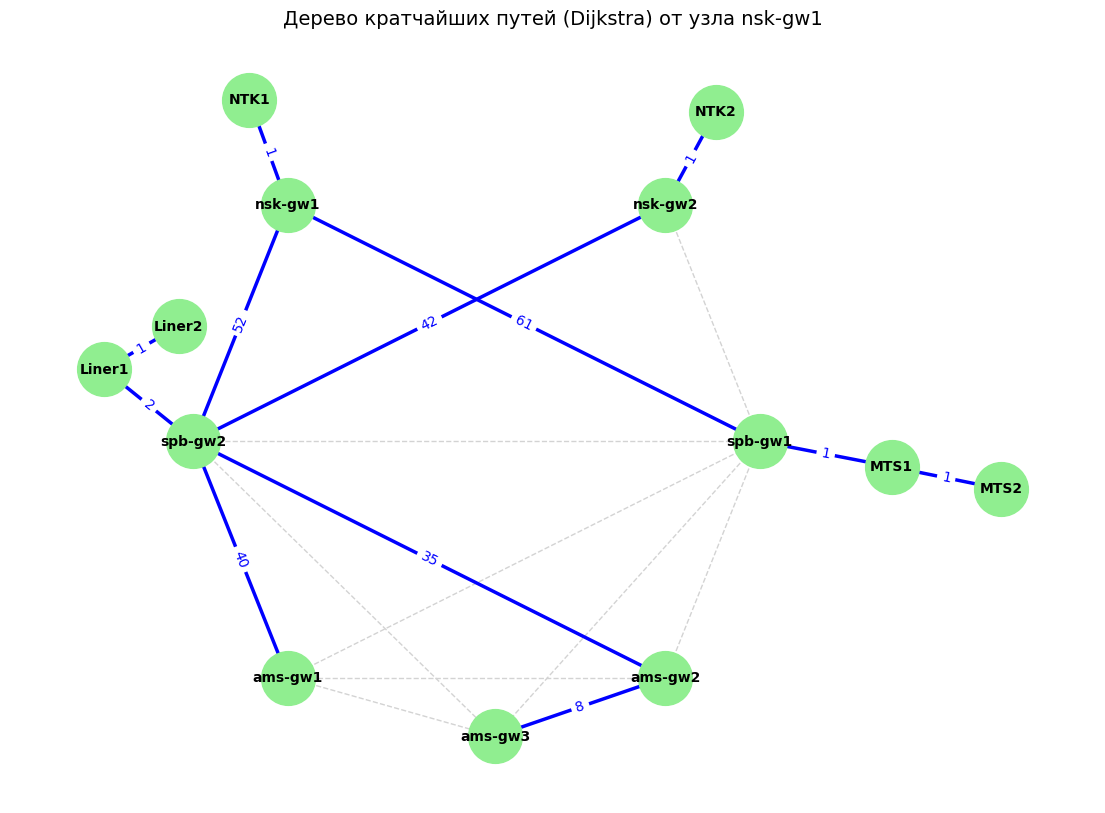

In [115]:
import matplotlib.pyplot as plt
import networkx as nx
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

animation_data = df_dijkstra.reset_index().to_dict('records')

plt.figure(figsize=(14, 10))

# Восстанавливаем ребра дерева
tree_edges = []
for node, parent in previous_nodes.items():
    if parent is not None:
        tree_edges.append((parent, node))

all_edges = list(G1.edges())
non_tree_edges = [e for e in all_edges if e not in tree_edges and (e[1], e[0]) not in tree_edges]

# Рисуем
nx.draw_networkx_nodes(G1, pos, node_color='lightgreen', node_size=1500)
nx.draw_networkx_labels(G1, pos, font_size=10, font_weight='bold')
nx.draw_networkx_edges(G1, pos, edgelist=non_tree_edges, edge_color='lightgray', style='dashed')
nx.draw_networkx_edges(G1, pos, edgelist=tree_edges, edge_color='blue', width=2.5, arrows=True)

# Веса
edge_labels = nx.get_edge_attributes(G1, 'weight')
tree_edge_labels = {k: v for k, v in edge_labels.items() if k in tree_edges or (k[1], k[0]) in tree_edges}
nx.draw_networkx_edge_labels(G1, pos, edge_labels=tree_edge_labels, font_color='blue')

plt.title(f"Дерево кратчайших путей (Dijkstra) от узла {start_node}", fontsize=14)
plt.axis('off')
plt.show()

###  6.в) Обход графа  
* Исследуйте два метода обхода графа (в глубину и в ширину). По шагам найдите последовательность обхода вершин (3 балла).  
* В результате укажите порядок обхода, количество шагов каждого алгоритма. Сделайте сравнительный анализ алгоритмов (2 балла).

In [116]:
# обход в ширину
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
from collections import deque


start_node = 'nsk-gw1'

bfs_order = []
bfs_history = []
queue = deque([start_node])
visited_bfs = {start_node}

step = 1
while queue:
    # Берем узел из начала очереди (FIFO)
    current = queue.popleft()
    bfs_order.append(current)
    neighbors = sorted(list(G1.neighbors(current)))
    added_neighbors = []
    
    for n in neighbors:
        if n not in visited_bfs:
            visited_bfs.add(n)
            queue.append(n)
            added_neighbors.append(n)
            
    bfs_history.append({
        'Шаг': step,
        'Посещенный узел': current,
        'Очередь (после добавления)': list(queue),
        'Добавленные соседи': added_neighbors
    })
    step += 1

print(f"=== BFS (В ширину) от {start_node} ===")
df_bfs = pd.DataFrame(bfs_history)
df_bfs_styled = df_bfs.style.set_properties(**{'text-align': 'left'}).hide(axis='index')
display(df_bfs_styled)

=== BFS (В ширину) от nsk-gw1 ===


Шаг,Посещенный узел,Очередь (после добавления),Добавленные соседи
1,nsk-gw1,"['NTK1', 'spb-gw1', 'spb-gw2']","['NTK1', 'spb-gw1', 'spb-gw2']"
2,NTK1,"['spb-gw1', 'spb-gw2']",[]
3,spb-gw1,"['spb-gw2', 'MTS1', 'ams-gw1', 'ams-gw2', 'ams-gw3', 'nsk-gw2']","['MTS1', 'ams-gw1', 'ams-gw2', 'ams-gw3', 'nsk-gw2']"
4,spb-gw2,"['MTS1', 'ams-gw1', 'ams-gw2', 'ams-gw3', 'nsk-gw2', 'Liner1']",['Liner1']
5,MTS1,"['ams-gw1', 'ams-gw2', 'ams-gw3', 'nsk-gw2', 'Liner1', 'MTS2']",['MTS2']
6,ams-gw1,"['ams-gw2', 'ams-gw3', 'nsk-gw2', 'Liner1', 'MTS2']",[]
7,ams-gw2,"['ams-gw3', 'nsk-gw2', 'Liner1', 'MTS2']",[]
8,ams-gw3,"['nsk-gw2', 'Liner1', 'MTS2']",[]
9,nsk-gw2,"['Liner1', 'MTS2', 'NTK2']",['NTK2']
10,Liner1,"['MTS2', 'NTK2', 'Liner2']",['Liner2']


In [117]:
# обход в длину
dfs_order = []
dfs_history = []
stack = [start_node]
visited_dfs = set()

step = 1
while stack:
    # Берем узел из конца стека (LIFO)
    current = stack.pop()
    
    if current not in visited_dfs:
        visited_dfs.add(current)
        dfs_order.append(current)
        
        # Берем соседей и разворачиваем список (reverse), чтобы при добавлении в стек
        # первый сосед по алфавиту оказался сверху стека и обработался первым
        neighbors = sorted(list(G1.neighbors(current)), reverse=True)
        added_neighbors = []
        
        for n in neighbors:
            if n not in visited_dfs:
                stack.append(n)
                added_neighbors.append(n)
        
        dfs_history.append({
            'Шаг': step,
            'Посещенный узел': current,
            'Стек (после добавления)': list(stack),
            'Добавленные соседи': added_neighbors
        })
        step += 1

print(f"\n=== DFS (В глубину) от {start_node} ===")
df_dfs = pd.DataFrame(dfs_history)
df_dfs_styled = df_dfs.style.set_properties(**{'text-align': 'left'}).hide(axis='index')
display(df_dfs_styled)


=== DFS (В глубину) от nsk-gw1 ===


Шаг,Посещенный узел,Стек (после добавления),Добавленные соседи
1,nsk-gw1,"['spb-gw2', 'spb-gw1', 'NTK1']","['spb-gw2', 'spb-gw1', 'NTK1']"
2,NTK1,"['spb-gw2', 'spb-gw1']",[]
3,spb-gw1,"['spb-gw2', 'spb-gw2', 'nsk-gw2', 'ams-gw3', 'ams-gw2', 'ams-gw1', 'MTS1']","['spb-gw2', 'nsk-gw2', 'ams-gw3', 'ams-gw2', 'ams-gw1', 'MTS1']"
4,MTS1,"['spb-gw2', 'spb-gw2', 'nsk-gw2', 'ams-gw3', 'ams-gw2', 'ams-gw1', 'MTS2']",['MTS2']
5,MTS2,"['spb-gw2', 'spb-gw2', 'nsk-gw2', 'ams-gw3', 'ams-gw2', 'ams-gw1']",[]
6,ams-gw1,"['spb-gw2', 'spb-gw2', 'nsk-gw2', 'ams-gw3', 'ams-gw2', 'spb-gw2', 'ams-gw3', 'ams-gw2']","['spb-gw2', 'ams-gw3', 'ams-gw2']"
7,ams-gw2,"['spb-gw2', 'spb-gw2', 'nsk-gw2', 'ams-gw3', 'ams-gw2', 'spb-gw2', 'ams-gw3', 'spb-gw2', 'ams-gw3']","['spb-gw2', 'ams-gw3']"
8,ams-gw3,"['spb-gw2', 'spb-gw2', 'nsk-gw2', 'ams-gw3', 'ams-gw2', 'spb-gw2', 'ams-gw3', 'spb-gw2', 'spb-gw2']",['spb-gw2']
9,spb-gw2,"['spb-gw2', 'spb-gw2', 'nsk-gw2', 'ams-gw3', 'ams-gw2', 'spb-gw2', 'ams-gw3', 'spb-gw2', 'nsk-gw2', 'Liner1']","['nsk-gw2', 'Liner1']"
10,Liner1,"['spb-gw2', 'spb-gw2', 'nsk-gw2', 'ams-gw3', 'ams-gw2', 'spb-gw2', 'ams-gw3', 'spb-gw2', 'nsk-gw2', 'Liner2']",['Liner2']


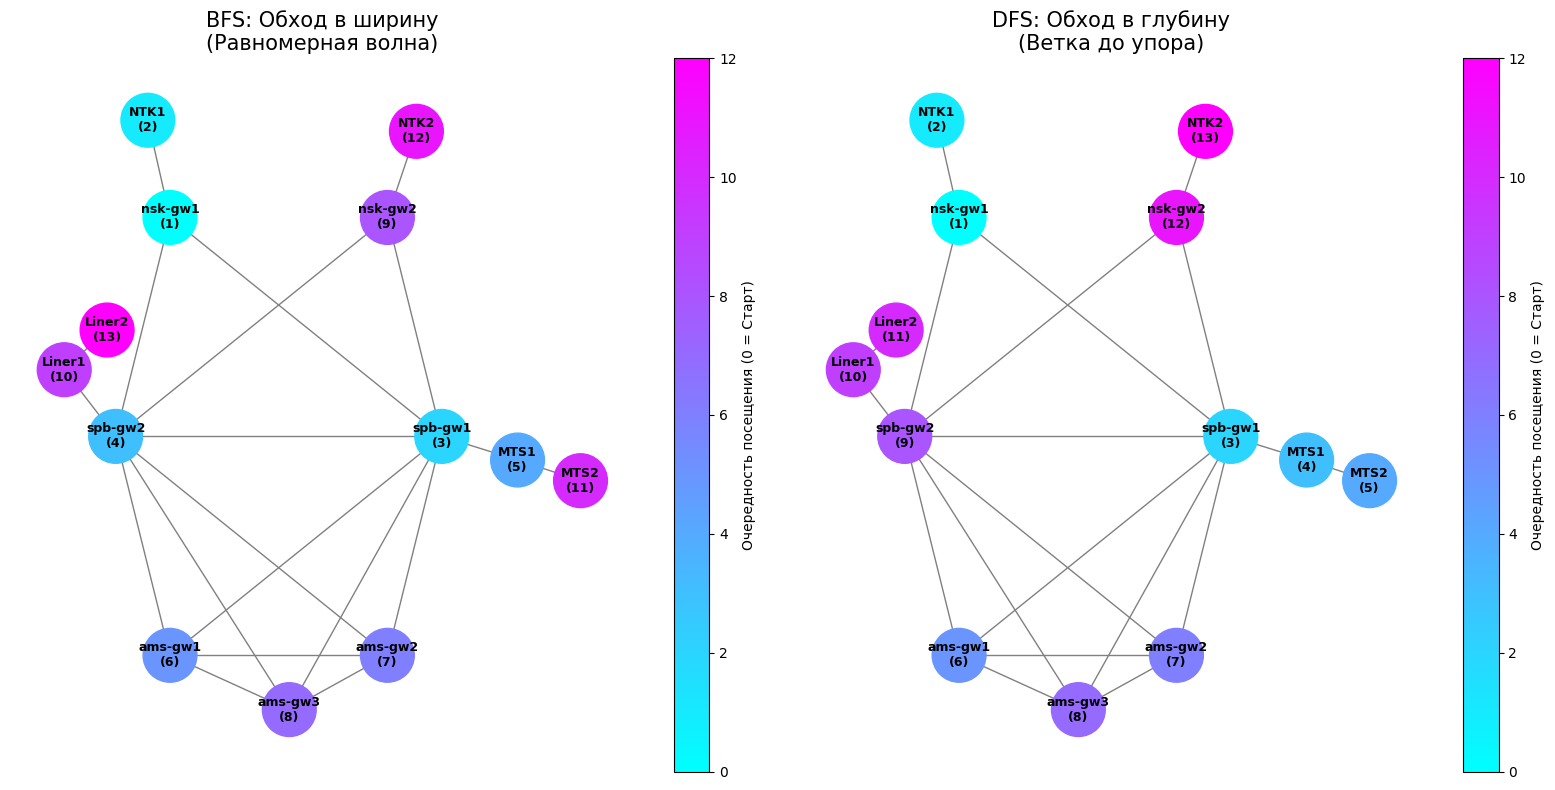

In [118]:
plt.figure(figsize=(16, 8))

# Функция для отрисовки
def draw_order(graph, pos, order, title, ax):
    # Создаем карту цветов: чем позже посетили, тем светлее/ярче цвет
    node_colors = [order.index(n) for n in graph.nodes()]
    
    # Рисуем узлы с цветовой картой 'viridis' или 'cool'
    nodes = nx.draw_networkx_nodes(graph, pos, node_color=node_colors, 
                                   cmap=plt.cm.cool, node_size=1500, ax=ax)
    
    # Подписи: Имя узла + (Порядковый номер)
    labels = {n: f"{n}\n({order.index(n) + 1})" for n in graph.nodes()}
    nx.draw_networkx_labels(graph, pos, labels=labels, font_size=9, font_weight='bold', ax=ax)
    
    # Ребра
    nx.draw_networkx_edges(graph, pos, edge_color='gray', ax=ax)
    
    ax.set_title(title, fontsize=15)
    ax.axis('off')
    # Добавляем Colorbar для понятности
    plt.colorbar(nodes, ax=ax, label="Очередность посещения (0 = Старт)")

# Рисуем BFS
ax1 = plt.subplot(121)
draw_order(G1, pos, bfs_order, "BFS: Обход в ширину\n(Равномерная волна)", ax1)

# Рисуем DFS
ax2 = plt.subplot(122)
draw_order(G1, pos, dfs_order, "DFS: Обход в глубину\n(Ветка до упора)", ax2)

plt.tight_layout()
plt.show()


###  6.г) Задача инспекции дорог (китайского почтальона)  

* Найдите в своем графе подграф с 7-8 вершинами, у которого лишь 2 (или 4) вершины имеют нечетную степень (2 балла)  
* Найдите длину оптимального маршрута китайского почтальона на найденном подграфе (3 балла)  
* Найдите маршрут минимальной длины, который использует каждое ребро хотя бы один раз и возвращает в начальную вершину (3 балла)

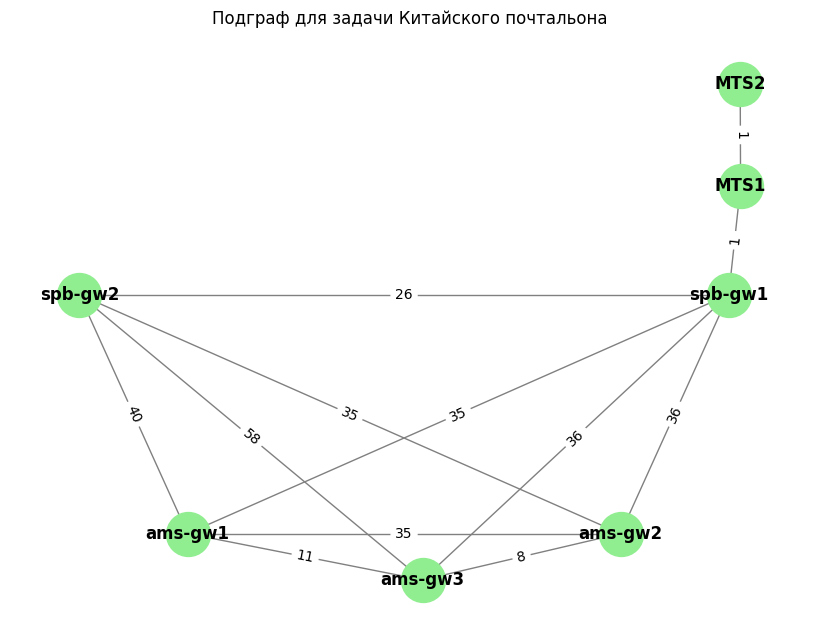

In [127]:
import matplotlib.pyplot as plt
import networkx as nx

# def            (1)     (2)       (5)        ()
target_nodes = ['MTS2', 'MTS1', 'spb-gw1', 'spb-gw2', 'ams-gw1', 'ams-gw2', 'ams-gw3']

G_sub = G1.subgraph(target_nodes)
plt.figure(figsize=(8, 6))

for u, v, data in G_sub.edges(data=True):
    real_weight = data["weight"]
    if real_weight > 0:
        data["spring_strength"] = 1 / real_weight * 5
    else:
        data["spring_strength"] = 0

fixed_positions = {
    "spb-gw2": [-0.3, 0.5],
    "spb-gw1": [0.9, 0.5],
    "ams-gw1": [-0.1, 0],
    "ams-gw2": [0.7, 0],
}

pos = nx.spring_layout(G1, 
    weight="spring_strength",
    k=(1 / len(nodes) ** 0.5),
    seed=42,
    pos=fixed_positions,
    fixed=fixed_positions.keys()
) 

nx.draw(G_sub, pos, 
        with_labels=True, 
        node_color='lightgreen', 
        node_size=1000, 
        font_weight='bold',
        edge_color='gray')

edge_weights = nx.get_edge_attributes(G_sub, 'weight')
nx.draw_networkx_edge_labels(G_sub, pos, edge_labels=edge_weights)

plt.title("Подграф для задачи Китайского почтальона")
plt.show()

In [128]:
# нарисуем матрицу связности
def highlight_connections(val):
    color = "#808080" if val == 0 else "black"
    weight = "normal" if val == 0 else "bold"
    bg_color = "" if val == 0 else "#e6f7ff"
    return f"color: {color}; font-weight: {weight}; background-color: {bg_color}"

df_adj = nx.to_pandas_adjacency(G_sub, weight="weight", dtype=int)

styler = df_adj.style.map(highlight_connections)
styler.set_properties(**{
    "width": "60px",       # Фиксированная ширина
    "min-width": "60px",   # Запрет на сжатие
    "max-width": "60px",   # Запрет на расширение
    "height": "60px",      # Фиксированная высота
    "text-align": "center",# Текст по центру
    "border": "2px solid lightgray" # Сетка (границы ячеек)
})
styler = styler.set_table_styles([
    {"selector": "th", "props": [
        ("text-align", "center"), 
        ("vertical-align", "center"), # Текст заголовков прижат к низу
        ("width", "60px"),
        ("min-width", "60px"),
        ("max-width", "60px")
    ]},
    # {"selector": "th.col_heading", "props": [
    #     ("writing-mode", "vertical-rl"), 
    #     ("transform", "rotate(180deg)"), 
    #     ("height", "100px"),  # Высота шапки, чтобы влез текст
    #     ("vertical-align", "top")
    # ]}
])

display(styler)

,MTS1,MTS2,spb-gw1,spb-gw2,ams-gw1,ams-gw2,ams-gw3
MTS1,0,1,1,0,0,0,0
MTS2,1,0,0,0,0,0,0
spb-gw1,1,0,0,26,35,36,36
spb-gw2,0,0,26,0,40,35,58
ams-gw1,0,0,35,40,0,35,11
ams-gw2,0,0,36,35,35,0,8
ams-gw3,0,0,36,58,11,8,0


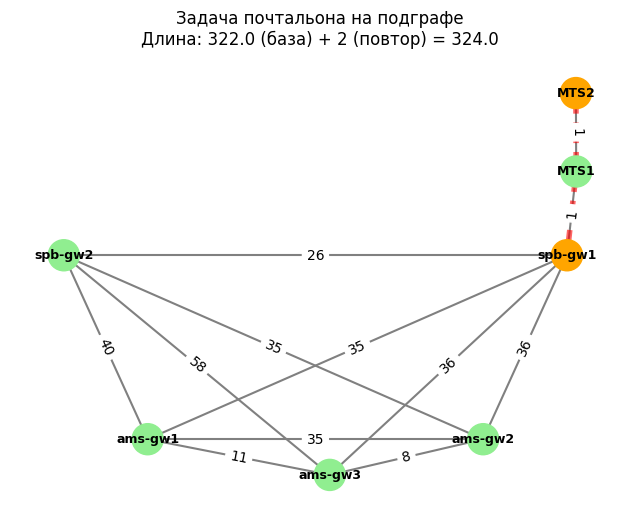

Нечетные вершины: ['MTS2', 'spb-gw1']
Путь, который нужно пройти дважды: MTS2 -> MTS1 -> spb-gw1


In [125]:
import matplotlib.pyplot as plt
import networkx as nx

# 1. Поиск нечетных вершин в ВАШЕМ G_sub
odd_nodes = [v for v, d in G_sub.degree() if d % 2 == 1]

# 2. Поиск кратчайшего пути между ними (что почтальон пройдет дважды)
# Важно: используем реальный вес ребер
u, v = odd_nodes[0], odd_nodes[1]
path_to_double = nx.dijkstra_path(G_sub, u, v, weight='weight')
doubled_edges = list(zip(path_to_double, path_to_double[1:]))

# 3. Отрисовка поверх вашей конфигурации
plt.figure(figsize=(8, 6))

# Рисуем все узлы: обычные - светло-зеленые, нечетные - оранжевые
node_colors = ['orange' if n in odd_nodes else 'lightgreen' for n in G_sub.nodes()]

nx.draw_networkx_nodes(G_sub, pos, node_color=node_colors, node_size=500)
nx.draw_networkx_labels(G_sub, pos, font_weight='bold', font_size=9)

# Рисуем все ребра подграфа (серые)
nx.draw_networkx_edges(G_sub, pos, edge_color='gray', width=1.5)

# Рисуем ДУБЛИРОВАННЫЕ ребра (красные, пунктирные, жирные)
nx.draw_networkx_edges(G_sub, pos, edgelist=doubled_edges, 
                       edge_color='red', width=4, style='--', alpha=0.6)

# Подписи весов
edge_weights = nx.get_edge_attributes(G_sub, 'weight')
nx.draw_networkx_edge_labels(G_sub, pos, edge_labels=edge_weights)

# Считаем длину маршрута
original_dist = G_sub.size(weight='weight')
extra_dist = nx.dijkstra_path_length(G_sub, u, v, weight='weight')

plt.title(f"Задача почтальона на подграфе\n"
          f"Длина: {original_dist} (база) + {extra_dist} (повтор) = {original_dist + extra_dist}")
plt.axis('off')
plt.show()

print(f"Нечетные вершины: {odd_nodes}")
print(f"Путь, который нужно пройти дважды: {' -> '.join(path_to_double)}")

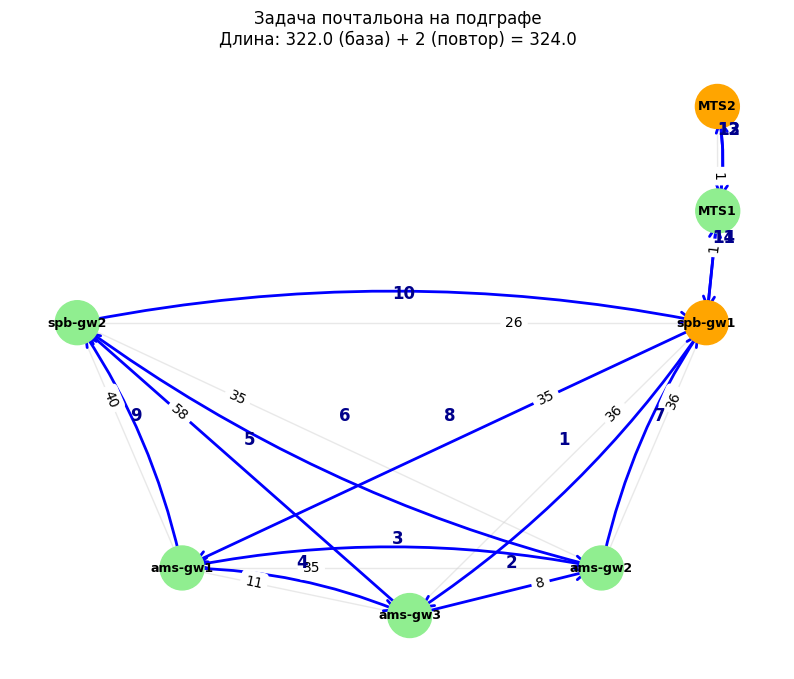

Последовательность обхода: spb-gw1 -> ams-gw3 -> ams-gw2 -> ams-gw1 -> ams-gw3 -> spb-gw2 -> ams-gw2 -> spb-gw1 -> ams-gw1 -> spb-gw2 -> spb-gw1 -> MTS1 -> MTS2 -> MTS1 -> spb-gw1


In [131]:
import matplotlib.pyplot as plt
import networkx as nx

# 1. Поиск нечетных вершин и пути для дублирования
odd_nodes = [v for v, d in G_sub.degree() if d % 2 == 1]
u, v = odd_nodes[0], odd_nodes[1]
path_to_double = nx.dijkstra_path(G_sub, u, v, weight='weight')

# 2. Создаем мультиграф и добавляем дублирующие ребра
# Это нужно, чтобы алгоритм эйлерова цикла понимал, что по одной дороге можно пройти дважды
M = nx.MultiGraph(G_sub)
for i in range(len(path_to_double) - 1):
    n1, n2 = path_to_double[i], path_to_double[i+1]
    w = G_sub[n1][n2]['weight']
    M.add_edge(n1, n2, weight=w)

# 3. Находим сам маршрут (Эйлеров цикл)
# Стартуем, например, с spb-gw1
start_node = 'spb-gw1'
euler_circuit = list(nx.eulerian_circuit(M, source=start_node))

# 4. Отрисовка
plt.figure(figsize=(10, 8))

# Узлы
node_colors = ['orange' if n in odd_nodes else 'lightgreen' for n in G_sub.nodes()]
nx.draw_networkx_nodes(G_sub, pos, node_color=node_colors, node_size=1000)
nx.draw_networkx_labels(G_sub, pos, font_weight='bold', font_size=9)

# Рисуем базовые ребра (серые)
nx.draw_networkx_edges(G_sub, pos, edge_color='lightgray', width=1, alpha=0.5)

# Рисуем маршрут стрелками
# Чтобы стрелки не перекрывали друг друга на двусторонних путях, используем connectionstyle
for i, (u_edge, v_edge) in enumerate(euler_circuit):
    # Рисуем каждое ребро маршрута со стрелкой
    nx.draw_networkx_edges(G_sub, pos, edgelist=[(u_edge, v_edge)], 
                           edge_color='blue', width=2, 
                           arrows=True, arrowsize=20, arrowstyle='->',
                           connectionstyle=f'arc3, rad={0.1 * (i % 3 - 1)}') # Небольшой изгиб, чтобы видеть шаги
    
    # Добавляем номер шага над ребром
    mid_x = (pos[u_edge][0] + pos[v_edge][0]) / 2
    mid_y = (pos[u_edge][1] + pos[v_edge][1]) / 2
    plt.text(mid_x, mid_y + 0.05, str(i+1), color='darkblue', fontsize=12, fontweight='bold')

# Веса
edge_weights = nx.get_edge_attributes(G_sub, 'weight')
nx.draw_networkx_edge_labels(G_sub, pos, edge_labels=edge_weights, label_pos=0.3)

original_dist = G_sub.size(weight='weight')
extra_dist = nx.dijkstra_path_length(G_sub, u, v, weight='weight')

# plt.title(f"Маршрут китайского почтальона (пронумерован)\n"
#           f"Итоговая дистанция: {original_dist + extra_dist}", fontsize=12)
plt.title(f"Задача почтальона на подграфе\n"
          f"Длина: {original_dist} (база) + {extra_dist} (повтор) = {original_dist + extra_dist}")
plt.axis('off')
plt.show()

# Печать текстовой последовательности
path_sequence = [start_node] + [edge[1] for edge in euler_circuit]
print(f"Последовательность обхода: {' -> '.join(path_sequence)}")

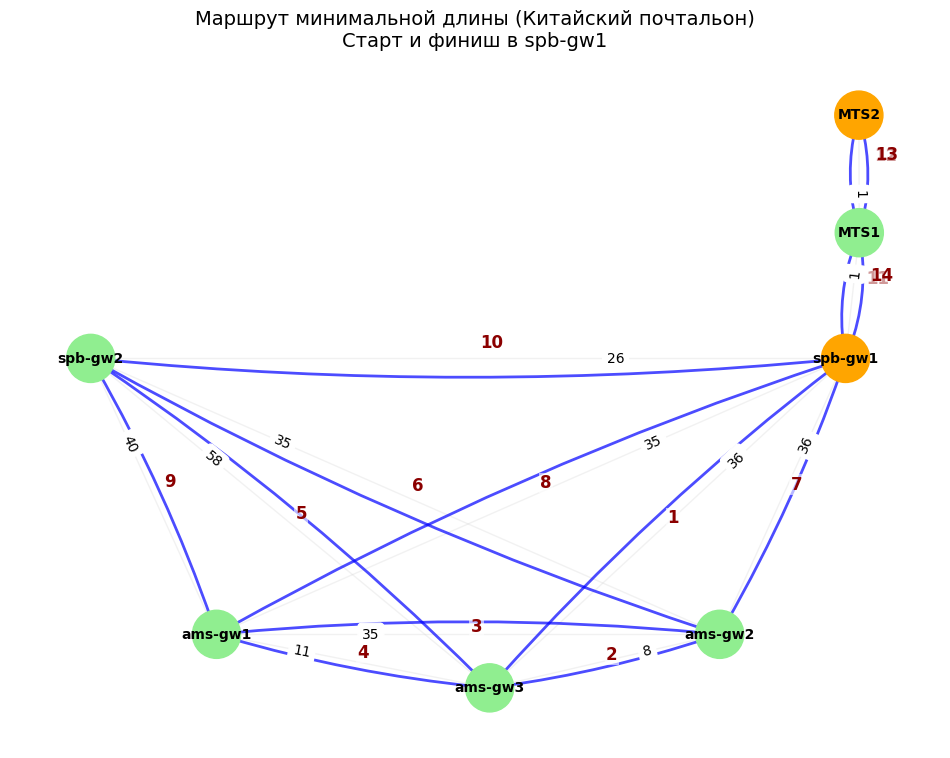

Оптимальная последовательность обхода:
spb-gw1 -> ams-gw3 -> ams-gw2 -> ams-gw1 -> ams-gw3 -> spb-gw2 -> ams-gw2 -> spb-gw1 -> ams-gw1 -> spb-gw2 -> spb-gw1 -> MTS1 -> MTS2 -> MTS1 -> spb-gw1


In [132]:
import matplotlib.pyplot as plt
import networkx as nx

# 1. Подготовка данных: поиск нечетных вершин и дублирующего пути
odd_nodes = [v for v, d in G_sub.degree() if d % 2 == 1]
u_odd, v_odd = odd_nodes[0], odd_nodes[1]
path_to_double = nx.dijkstra_path(G_sub, u_odd, v_odd, weight='weight')

# 2. Создаем Мультиграф для поиска Эйлерова цикла
# В обычном графе нельзя провести два ребра между одними узлами, а в MultiGraph — можно.
M = nx.MultiGraph(G_sub)
for i in range(len(path_to_double) - 1):
    n1, n2 = path_to_double[i], path_to_double[i+1]
    M.add_edge(n1, n2, weight=G_sub[n1][n2]['weight'])

# 3. Находим маршрут (Эйлеров цикл)
start_node = "spb-gw1"
euler_circuit = list(nx.eulerian_circuit(M, source=start_node))

# 4. Визуализация маршрута
plt.figure(figsize=(12, 9))

# Рисуем узлы
node_colors = ['orange' if n in odd_nodes else 'lightgreen' for n in G_sub.nodes()]
nx.draw_networkx_nodes(G_sub, pos, node_color=node_colors, node_size=1200)
nx.draw_networkx_labels(G_sub, pos, font_weight='bold', font_size=10)

# Рисуем фоновые ребра (слабо-серые)
nx.draw_networkx_edges(G_sub, pos, edge_color='lightgray', width=1, alpha=0.3)

# Рисуем маршрут по шагам со стрелками
for i, (u, v) in enumerate(euler_circuit):
    # Добавляем изгиб (rad), чтобы стрелки "туда" и "обратно" не перекрывались
    edge_rad = 0.15 if (u, v) in zip(path_to_double, path_to_double[1:]) or (v, u) in zip(path_to_double, path_to_double[1:]) else 0.05
    
    nx.draw_networkx_edges(
        G_sub, pos, edgelist=[(u, v)],
        edge_color='blue', 
        width=2,
        arrows=True, 
        arrowsize=20, 
        connectionstyle=f'arc3, rad={edge_rad}', # Изгиб для наглядности
        alpha=0.7
    )
    
    # Считаем координаты для номера шага (чуть со смещением от центра ребра)
    mx = (pos[u][0] + pos[v][0]) / 2 + (0.03 * i/len(euler_circuit))
    my = (pos[u][1] + pos[v][1]) / 2 + (0.03 * i/len(euler_circuit))
    plt.text(mx, my, str(i+1), color='darkred', fontsize=12, fontweight='bold', 
             bbox=dict(facecolor='white', alpha=0.6, edgecolor='none', pad=1))

# Подписи весов
edge_labels = nx.get_edge_attributes(G_sub, 'weight')
nx.draw_networkx_edge_labels(G_sub, pos, edge_labels=edge_labels, label_pos=0.3)

plt.title(f"Маршрут минимальной длины (Китайский почтальон)\nСтарт и финиш в {start_node}", fontsize=14)
plt.axis('off')
plt.show()

# Вывод текстовой последовательности
path_seq = [start_node] + [edge[1] for edge in euler_circuit]
print(f"Оптимальная последовательность обхода:\n{' -> '.join(path_seq)}")

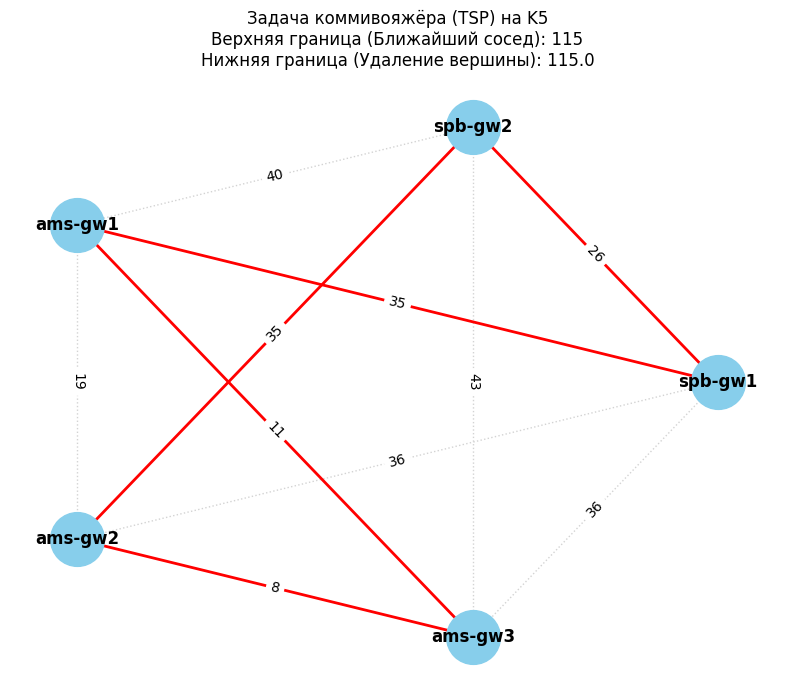

Маршрут ближайшего соседа: spb-gw1 -> spb-gw2 -> ams-gw2 -> ams-gw3 -> ams-gw1 -> spb-gw1


In [133]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt


tsp_nodes = ['spb-gw1', 'spb-gw2', 'ams-gw1', 'ams-gw2', 'ams-gw3']
G_tsp = nx.Graph()

# Заполняем веса, используя кратчайшие расстояния из основного графа G1
for i in range(len(tsp_nodes)):
    for j in range(i + 1, len(tsp_nodes)):
        u, v = tsp_nodes[i], tsp_nodes[j]
        # Находим реальный кратчайший путь (например, заменит 58 на 43 для пары spb2-ams3)
        dist = nx.dijkstra_path_length(G1, u, v, weight='weight')
        G_tsp.add_edge(u, v, weight=dist)

# ВЕРХНЯЯ ГРАНИЦА (Метод ближайшего соседа)
start_node = 'spb-gw1'
path = [start_node]
unvisited = set(G_tsp.nodes())
unvisited.remove(start_node)
upper_bound = 0
current = start_node

while unvisited:
    # Ищем соседа с минимальным весом ребра
    next_node = min(unvisited, key=lambda node: G_tsp[current][node]['weight'])
    weight = G_tsp[current][next_node]['weight']
    upper_bound += weight
    path.append(next_node)
    unvisited.remove(next_node)
    current = next_node

# Замыкаем цикл (возвращаемся в начало)
upper_bound += G_tsp[current][start_node]['weight']
path.append(start_node)

# НИЖНЯЯ ГРАНИЦА (Метод удаления вершины).
node_removed = 'spb-gw1'
G_minus = G_tsp.copy()
G_minus.remove_node(node_removed)

# Строим MST для оставшихся 4-х вершин
mst_sub = nx.minimum_spanning_tree(G_minus, weight='weight')
mst_weight = mst_sub.size(weight='weight')

# Находим два самых дешевых ребра, соединяющих удаленный узел с остальными
connection_weights = sorted([G_tsp[node_removed][neighbor]['weight'] for neighbor in G_minus.nodes()])
lower_bound = mst_weight + connection_weights[0] + connection_weights[1]

plt.figure(figsize=(10, 8))
tsp_pos = nx.circular_layout(G_tsp)
nx.draw_networkx_edges(G_tsp, tsp_pos, edge_color='lightgray', style='dotted')

path_edges = list(zip(path, path[1:]))
nx.draw_networkx_edges(G_tsp, tsp_pos, edgelist=path_edges, edge_color='red', width=2)

nx.draw_networkx_nodes(G_tsp, tsp_pos, node_color='skyblue', node_size=1500)
nx.draw_networkx_labels(G_tsp, tsp_pos, font_weight='bold')

edge_labels = nx.get_edge_attributes(G_tsp, 'weight')
nx.draw_networkx_edge_labels(G_tsp, tsp_pos, edge_labels=edge_labels)

plt.title(f"Задача коммивояжёра (TSP) на K5\n"
          f"Верхняя граница (Ближайший сосед): {upper_bound}\n"
          f"Нижняя граница (Удаление вершины): {lower_bound}", fontsize=12)
plt.axis('off')
plt.show()

print(f"Маршрут ближайшего соседа: {' -> '.join(path)}")